In [3]:
%pylab inline
from astropy import units
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [2]:
from profiles import *

In [14]:
#G = constants.G
H = 67.8 * units.km / units.s / units.Mpc
print G, H

 4.51835939627e-39 kpc3 / (s2 solMass) 67.8 km / (Mpc s)


In [5]:
vc_NFW?
Rvir = 261 * units.kpc
Mvir = 1E12 * units.Msun

In [6]:
vc = vc_NFW(261/26.47, 261, 0, 0, 1E12)

In [7]:
vc1 = np.sqrt( ( G * Mvir )/ Rvir)

print vc, vc1.to(units.km / units.s)

128.353442223 km / s 128.386889681 km / s


In [8]:
f = 360 * 0.27
print f

97.2


In [9]:
M = vc**3 / (np.sqrt(48.6) * G * H)

In [10]:
print M.to(units.Msun)

1.03990309166e+12 solMass


In [11]:
R = vc / (np.sqrt(48.6) * H)

In [12]:
R.to(units.kpc)

<Quantity 271.556180573134 kpc>

In [13]:
v_chervin = 162.9 * units.km / units.s

In [14]:
M = v_chervin**3 / (10 * G * H)
M =  M.to(units.Msun)
print M

1.48201191852e+12 solMass


In [15]:
R = v_chervin / (10*H)
print R.to(units.kpc)

240.265486726 kpc


In [16]:
Mvir

<Quantity 1000000000000.0 solMass>

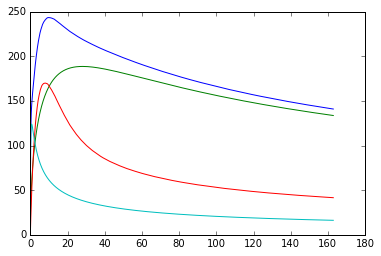

In [18]:
plot(IC[:,0], IC[:,1])
plot(IC[:,0], IC[:,2])
plot(IC[:,0], IC[:,3])
plot(IC[:,0], IC[:,4])

In [110]:
#IC_chervin = loadtxt('../data/ICs/MW/1E12/chervin.txt', skiprows=1)
IC_hack = loadtxt('../../ICs/GalIC-hack/MW/rotcurve.txt', skiprows=1)

In [111]:
x = linspace(0, 170)

In [115]:
#M = 1.46E12 
#Md = M * 0.065
#Mb = M * 0.01
#Mh = M - Md - Mb
Mh = 1.46632143373E12 * units.Msun
print Mh * 0.70
#Mh = 1.02E12 * units.Msun
#A = 2.00 * 24.2
A_approx = 53.0763421649
print A_approx * 0.7
vc_halo = vc_hernquist(A_approx * 0.7, x, 0, 0, Mh.value * 0.7)
#Mnfw = 1E12-(1E12*0.065 + 1E12*0.01)
#vc_N = vc_NFW(10, x, 0, 0, Mh.value / 1.46)
#vc_disk = vc_mn?
#print M, Mnfw
print 18.627788/0.7

1.02642500361e+12 solMass
37.1534395154
26.6111257143


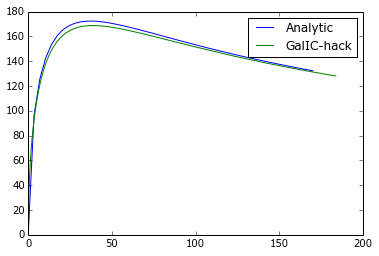

In [116]:
plot(x,  vc_halo, label='Analytic')
#plot(IC_chervin[:,0], IC_chervin[:,2], label='GalIC')
#plot(x, vc_N)
plot(IC_hack[:,0], IC_hack[:,2], label='GalIC-hack')
legend(loc='best')
savefig('halo_MW.png', bbox_inches='tight')

In [22]:
vc_bulge = vc_hernquist(A * 0.025, x, 0, 0, Mb.value)

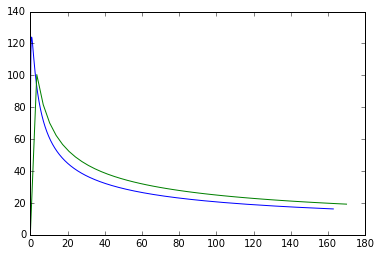

In [23]:
plot(IC[:,0], IC[:,4])
plot(x, vc_bulge)

## LMC1 rotation curves 

In [24]:
#data_n = loadtxt('../data/ICs/LMC/curve1_n.txt', skiprows=1)
data_n = loadtxt('rotcurve.txt', skiprows=1)

In [25]:
x = linspace(0, 60, 100)
vc_1 = vc_hernquist(8, x, 0, 0, 3E10)
vc_2 = vc_hernquist(11, x, 0, 0, 5E10)
vc_3 = vc_hernquist(14, x, 0, 0, 8E10)
vc_4 = vc_hernquist(15, x, 0, 0, 1E11)
vc_5 = vc_hernquist(20, x, 0, 0, 1.8E11)
vc_6 = vc_hernquist(22.5, x, 0, 0, 2.5E11)

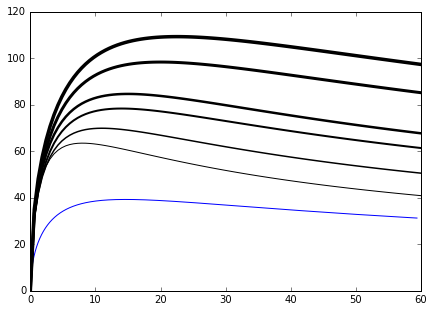

In [26]:
figure(figsize=(7, 5))
#plot(data_c[:,0], data_c[:,1])
plot(data_n[:,0], data_n[:,1])

# ---------------- Theoretical -----------------------
plot(x, vc_1, c='k', lw=1)
plot(x, vc_2, c='k', lw=1.5)
plot(x, vc_3, c='k', lw=2)
plot(x, vc_4, c='k' ,lw=2.5)
plot(x, vc_5, c='k', lw=3)
plot(x, vc_6, c='k', lw=3.5)

In [46]:
vc_hernquist?

$M_{vir} \& R_{vir}$

In [88]:
h = 0.7
Delta_vir = 360
Omega_m = 0.27

def method1(Mvir):
    Rvir = 206 / h * units.kpc * (Delta_vir * Omega_m / 97.2)**(-1.0/3.0) * (Mvir * h / (1E12 * units.Msun) )**(1.0/3.0)
    return Rvir.to(units.kpc)

def method2(Mvir):
    Rvir = (2*G / (H*0.7)**2)**(1/3.0) * (Mvir / (Delta_vir * Omega_m))**(1/3.0)
    return Rvir.to(units.kpc)

In [89]:
Mvir = 1E12 * units.Msun

In [90]:
print 'method 1 ', method1(Mvir)
print 'method 2 ', method2(Mvir)

method 1  261.29746337 kpc
method 2  262.391566682 kpc


In [91]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [49]:
 H = 3.2407789E-18  / units.s 

In [82]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [57]:
V = 128.04 * units.km / units.s
Mvir_deduced  = V**3 / (sqrt(48.6) * G * H) 
Rvir_deduced = V / (6.97 * H *0.7)

In [58]:
print Mvir_deduced.to(units.Msun)
print Rvir_deduced.to(units.kpc)

6.9990170459e+11 solMass
262.430857527 kpc


In [59]:
102/0.7

145.71428571428572